In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["sex", "length", "diameter", "height", "wholeWeight", "shuckedWeight", "visceraWeight", "shellWeight", "rings"]
df = pd.read_csv("abalone.data", names = cols)
df = df.drop("sex", axis = "columns")
cols = ["length", "diameter", "height", "wholeWeight", "shuckedWeight", "visceraWeight", "shellWeight", "rings"]

In [ ]:
df.head()

,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


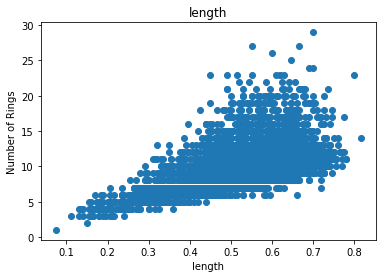

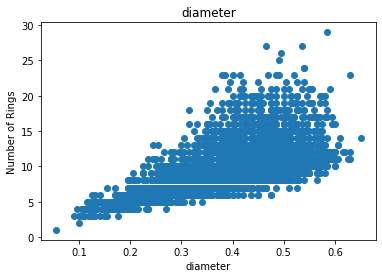

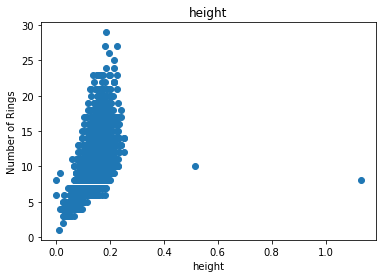

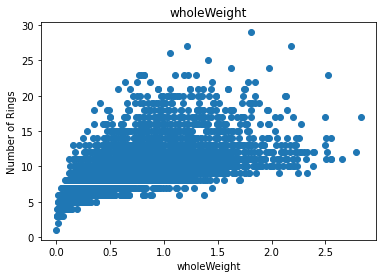

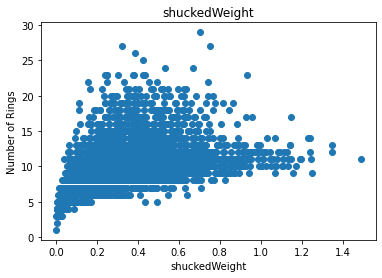

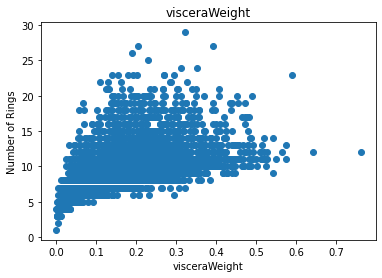

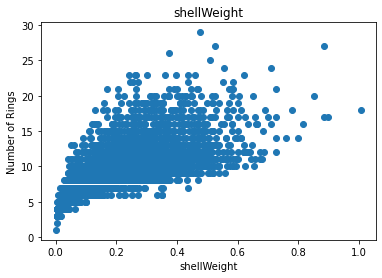

In [ ]:
for label in cols[:-1]:
  plt.scatter(df[label], df["rings"])
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Number of Rings")
  plt.show()

#Train, validation, test datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

NameError: ignored

In [ ]:
y_pred = knn_model.predict(X_test)

NameError: name 'knn_model' is not defined